# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth. Please see last chart for visualization
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 40, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, it does seem stronger at the moment as you move away from the equator.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
lats = []
lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
# Run a test city to pull params available and how they are called for later coding
# Tried running without a test city and received 401 (Unauthorized) error, was able to pull with test city

# define url and test city
url = "http://api.openweathermap.org/data/2.5/weather?"
test = "Plano"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + test

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# print the weather params in test city
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -96.69, 'lat': 33.01}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 283.81, 'pressure': 1014, 'humidity': 96, 'temp_min': 282.15, 'temp_max': 284.85}, 'visibility': 4023, 'wind': {'speed': 6.7, 'deg': 150}, 'rain': {'1h': 1.73}, 'clouds': {'all': 90}, 'dt': 1547261580, 'sys': {'type': 1, 'id': 3783, 'message': 0.007, 'country': 'US', 'sunrise': 1547299816, 'sunset': 1547336410}, 'id': 4719457, 'name': 'Plano', 'cod': 200}.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create a df of the cities 
cities_df = pd.DataFrame({"City": cities})

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()

#Create a df to add all the data from the API calls.
column_names = ["Date","City", "Country","Latitude","Longitude","Temperature (F)",
                "Humidity (%)","Cloudiness (%)", "Wind Speed (mph)"]
weather_df = pd.DataFrame(columns=column_names)

row_count = 1

print("Start Processing")
print("---------------------------------------")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found. Skipping...")

    else:
        weather_df.set_value(index, "Date", city_data["dt"])
        weather_df.set_value(index, "City", city_data["name"])
        weather_df.set_value(index, "Country", city_data["sys"]["country"])
        weather_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        weather_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        weather_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        weather_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        weather_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        weather_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Processing Record # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        row_count += 1
print("---------------------------------------")
print("Processing Complete")

Start Processing
---------------------------------------


C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_v

------------------------
Processing Record #  1  |  Puerto Ayora EC
------------------------
Processing Record #  2  |  Pangnirtung CA
City not found. Skipping...
------------------------
Processing Record #  3  |  Tashtagol RU
------------------------
Processing Record #  4  |  Atuona PF
City not found. Skipping...
------------------------
Processing Record #  5  |  Methoni GR
------------------------
Processing Record #  6  |  Saskylakh RU
------------------------
Processing Record #  7  |  Carnarvon ZA
------------------------
Processing Record #  8  |  Cape Town ZA
------------------------
Processing Record #  9  |  Kapaa US
------------------------
Processing Record #  10  |  Saint-Philippe CA
------------------------
Processing Record #  11  |  Vanimo PG
------------------------
Processing Record #  12  |  Madarounfa NE
------------------------
Processing Record #  13  |  Jamestown AU
------------------------
Processing Record #  14  |  Sur OM
------------------------
Processing 

------------------------
Processing Record #  123  |  Nuuk GL
------------------------
Processing Record #  124  |  Nieuw Amsterdam SR
------------------------
Processing Record #  125  |  Lebu ET
------------------------
Processing Record #  126  |  Yar-Sale RU
City not found. Skipping...
------------------------
Processing Record #  127  |  Nikolskoye RU
------------------------
Processing Record #  128  |  Mar del Plata AR
------------------------
Processing Record #  129  |  Severo-Kurilsk RU
------------------------
Processing Record #  130  |  Alyangula AU
------------------------
Processing Record #  131  |  Morondava MG
------------------------
Processing Record #  132  |  Sosnovo-Ozerskoye RU
------------------------
Processing Record #  133  |  Kavaratti IN
------------------------
Processing Record #  134  |  Ambatofinandrahana MG
------------------------
Processing Record #  135  |  Lerwick GB
------------------------
Processing Record #  136  |  Kano NG
-------------------

------------------------
Processing Record #  240  |  Dali CN
------------------------
Processing Record #  241  |  Geraldton CA
------------------------
Processing Record #  242  |  Bad Lauterberg DE
------------------------
Processing Record #  243  |  Dunedin NZ
------------------------
Processing Record #  244  |  Angoche MZ
------------------------
Processing Record #  245  |  Mount Pleasant US
------------------------
Processing Record #  246  |  Port Blair IN
------------------------
Processing Record #  247  |  Urusha RU
------------------------
Processing Record #  248  |  Nouadhibou MR
------------------------
Processing Record #  249  |  Catuday PH
------------------------
Processing Record #  250  |  Berlevag NO
------------------------
Processing Record #  251  |  Tamandare BR
City not found. Skipping...
------------------------
Processing Record #  252  |  Kashira RU
------------------------
Processing Record #  253  |  Fortuna ES
------------------------
Processing Recor

------------------------
Processing Record #  358  |  Fatehpur PK
------------------------
Processing Record #  359  |  Faya SA
------------------------
Processing Record #  360  |  Nortelandia BR
------------------------
Processing Record #  361  |  San Rafael AR
------------------------
Processing Record #  362  |  Malindi KE
------------------------
Processing Record #  363  |  Cayenne GF
City not found. Skipping...
------------------------
Processing Record #  364  |  Zhireken RU
------------------------
Processing Record #  365  |  Tosya TR
City not found. Skipping...
------------------------
Processing Record #  366  |  Naze NG
------------------------
Processing Record #  367  |  Fengrun CN
------------------------
Processing Record #  368  |  Cumana VE
------------------------
Processing Record #  369  |  Bilma NE
------------------------
Processing Record #  370  |  Tambacounda SN
------------------------
Processing Record #  371  |  Faanui PF
City not found. Skipping...
-----

City not found. Skipping...
------------------------
Processing Record #  479  |  LaPlace US
------------------------
Processing Record #  480  |  Finschhafen PG
------------------------
Processing Record #  481  |  Nosy Varika MG
------------------------
Processing Record #  482  |  Rongai KE
------------------------
Processing Record #  483  |  Zamania IN
City not found. Skipping...
------------------------
Processing Record #  484  |  Tessalit ML
------------------------
Processing Record #  485  |  Magan RU
------------------------
Processing Record #  486  |  Bitkine TD
------------------------
Processing Record #  487  |  Kupang ID
------------------------
Processing Record #  488  |  Suzun RU
City not found. Skipping...
------------------------
Processing Record #  489  |  Raudeberg NO
City not found. Skipping...
------------------------
Processing Record #  490  |  Suez EG
------------------------
Processing Record #  491  |  Hollister US
------------------------
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Export city data to a csv
output_data_file = weather_df.to_csv(".../starter_code/weather.csv", sep='\t', encoding='utf-8')

#Display counts of the Dataframe to confirm still sufficient count
weather_df.count()

Date                553
City                553
Country             553
Latitude            553
Longitude           553
Temperature (F)     553
Humidity (%)        553
Cloudiness (%)      553
Wind Speed (mph)    553
dtype: int64

In [6]:
weather_df.head()

,Date,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1547262599,Puerto Ayora,EC,-0.74,-90.35,76.39,100,48,9.19
1,1547262553,Pangnirtung,CA,66.15,-65.72,-18.43,53,64,3.15
3,1547262599,Tashtagol,RU,52.76,87.85,3.67,78,76,2.37
4,1547262566,Atuona,PF,-9.8,-139.03,81.47,100,0,16.24
6,1547262600,Methoni,GR,36.82,21.7,62.26,100,88,11.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

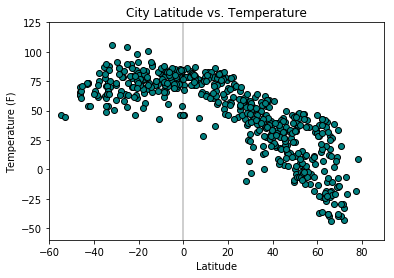

In [7]:
# Axes values
x_axis = weather_df["Latitude"]
y_axis = weather_df["Temperature (F)"]

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c="teal", edgecolors="black")

#label chart highlight the Equator 
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-60,125)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig(".../starter_code/LatitudeVsTemperature.png")

#Show chart
plt.show()

#### Latitude vs. Humidity Plot

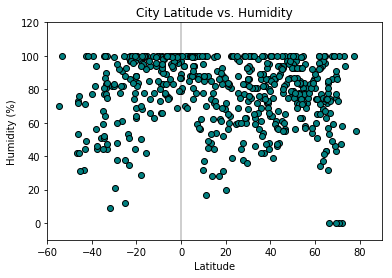

In [8]:
# Axes values
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity (%)"]

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c="teal", edgecolors="black", alpha=1)

#label chart highlight the Equator 
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-10,120)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig(".../starter_code/LatitudeVsHumidity.png")

#Show chart
plt.show()

#### Latitude vs. Cloudiness Plot

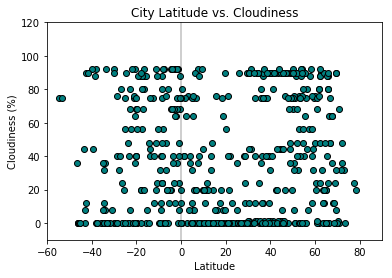

In [14]:
# Axes values
x_axis = weather_df["Latitude"]
y_axis = weather_df["Cloudiness (%)"]

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c="teal", edgecolors="black", alpha=1)

#label chart highlight the Equator 
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,120)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig(".../starter_code/LatitudeVsCloudiness.png")

#Show chart
plt.show()

#### Latitude vs. Wind Speed Plot

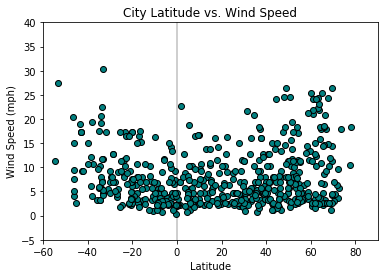

In [10]:
# Axes values
x_axis = weather_df["Latitude"]
y_axis = weather_df["Wind Speed (mph)"]

#set conditions for scatter plot
plt.scatter(x_axis, y_axis, c="teal", edgecolors="black", alpha=1)

#label chart highlight the Equator 
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)
plt.axvline(0, color = 'black', alpha = .25)

# Save chart
plt.savefig(".../starter_code/LatitudeVsWindSpeed.png")

#Show chart
plt.show()

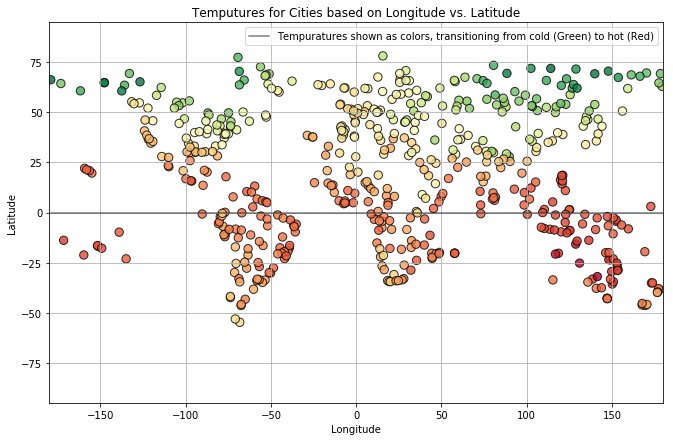

In [11]:
#Build a scatter plot to show positions of citites pulled
plt.figure(figsize = (11,7))
plt.scatter(weather_df["Longitude"], 
            weather_df["Latitude"], 
            c=weather_df["Temperature (F)"],
            s=70,
            edgecolor="black", linewidths=1, marker="o", 
            cmap="RdYlGn_r", alpha=0.8, label="City")

#label chart highlight the Equator 
plt.title(f"Temputures for Cities based on Longitude vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.axhline(0, color = "black", alpha = .5)
plt.grid(True)
plt.xlim([-180, 180])
plt.ylim([-95, 95])
plt.legend(["Tempuratures shown as colors, transitioning from cold (Green) to hot (Red)"])

# Save chart
plt.savefig(".../starter_code/Latitude_Longitude.png")

#Show chart
plt.show()